## Project : Bank Account Fraud

In [63]:
# Importation of necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc

## Load and  Initial Inspection

### Load

In [64]:
# Loading the dataset
df=pd.read_csv("data/Fraud_Detection.csv")

### Comprehension and Inspection

In [65]:
 #  Initial Comprehension
print("Preview of the first 5 lines ")
df.head()

Preview of the first 5 lines 


,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,...,0,1500.0,0,INTERNET,16.224843,linux,1,1,0,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,...,0,1500.0,0,INTERNET,3.363854,other,1,1,0,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,...,0,200.0,0,INTERNET,22.730559,windows,0,1,0,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,...,0,200.0,0,INTERNET,15.215816,linux,1,1,0,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,...,0,200.0,0,INTERNET,3.743048,other,0,1,0,0


In [66]:
# Show the shape of our dataset
df.shape

(1000000, 32)

In [67]:
# Global information about our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

In [68]:
# Get statistical information about our dataset

df.describe()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,...,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.0,1000000.000000
mean,0.011029,0.562696,0.493694,16.718568,86.587867,33.689080,1.025705e+00,8.661499,1572.692049,5665.296605,...,0.889676,10.839303,0.222988,515.851010,0.025242,7.544940,0.576947,1.018312,0.0,3.288674
std,0.104438,0.290343,0.289125,44.046230,88.406599,12.025799,5.381835e+00,20.236155,1005.374565,3009.380665,...,0.313293,12.116875,0.416251,487.559902,0.156859,8.033106,0.494044,0.180761,0.0,2.209994
min,0.000000,0.100000,0.000001,-1.000000,-1.000000,10.000000,4.036860e-09,-15.530555,1.000000,-170.603072,...,0.000000,-1.000000,0.000000,190.000000,0.000000,-1.000000,0.000000,-1.000000,0.0,0.000000
25%,0.000000,0.300000,0.225216,-1.000000,19.000000,20.000000,7.193246e-03,-1.181488,894.000000,3436.365848,...,1.000000,-1.000000,0.000000,200.000000,0.000000,3.103053,0.000000,1.000000,0.0,1.000000
50%,0.000000,0.600000,0.492153,-1.000000,52.000000,30.000000,1.517574e-02,-0.830507,1263.000000,5319.769349,...,1.000000,5.000000,0.000000,200.000000,0.000000,5.114321,1.000000,1.000000,0.0,3.000000
75%,0.000000,0.800000,0.755567,12.000000,130.000000,40.000000,2.633069e-02,4.984176,1944.000000,7680.717827,...,1.000000,25.000000,0.000000,500.000000,0.000000,8.866131,1.000000,1.000000,0.0,5.000000
max,1.000000,0.900000,0.999999,383.000000,428.000000,90.000000,7.845690e+01,112.956928,6700.000000,16715.565404,...,1.000000,32.000000,1.000000,2100.000000,1.000000,85.899143,1.000000,2.000000,0.0,7.000000


In [69]:
# Checking the number of null values or NaN values

df.isna().sum()

fraud_bool                          0
income                              0
name_email_similarity               0
prev_address_months_count           0
current_address_months_count        0
customer_age                        0
days_since_request                  0
intended_balcon_amount              0
payment_type                        0
zip_count_4w                        0
velocity_6h                         0
velocity_24h                        0
velocity_4w                         0
bank_branch_count_8w                0
date_of_birth_distinct_emails_4w    0
employment_status                   0
credit_risk_score                   0
email_is_free                       0
housing_status                      0
phone_home_valid                    0
phone_mobile_valid                  0
bank_months_count                   0
has_other_cards                     0
proposed_credit_limit               0
foreign_request                     0
source                              0
session_leng

In [70]:
#Checking the numbers of duplicated rows

df.duplicated().sum()

np.int64(0)

In [71]:
# Getting the columns filled with -1

check_minus_one = (df == -1).sum()
check_minus_one[check_minus_one > 0]

prev_address_months_count       712920
current_address_months_count      4254
credit_risk_score                  488
bank_months_count               253635
session_length_in_minutes         2015
device_distinct_emails_8w          359
dtype: int64

In [72]:
# Showing how dataset is partionned 

df["fraud_bool"].value_counts(normalize=True)

fraud_bool
0    0.988971
1    0.011029
Name: proportion, dtype: float64

## Data cleaning

In [73]:

# Replacing -1 values with NaN values

df.replace(-1,np.nan,inplace=True)


In [74]:
# Checking the number of null values or NaN values after replacement
print("Les nombres de valeurs NaN sont:")
df.isnull().sum()[df.isna().sum()>0]

Les nombres de valeurs NaN sont:


prev_address_months_count       712920
current_address_months_count      4254
credit_risk_score                  488
bank_months_count               253635
session_length_in_minutes         2015
device_distinct_emails_8w          359
dtype: int64

In [75]:
# Checking the number of customers with age less than 18

(df["customer_age"]<18).sum()

np.int64(20987)

In [76]:
# Filter only the customer who them age is greater or equal to 18

df=df[df["customer_age"]>=18]


In [77]:
# Final check of NaN values
df.isna().sum()

fraud_bool                               0
income                                   0
name_email_similarity                    0
prev_address_months_count           697722
current_address_months_count          4173
customer_age                             0
days_since_request                       0
intended_balcon_amount                   0
payment_type                             0
zip_count_4w                             0
velocity_6h                              0
velocity_24h                             0
velocity_4w                              0
bank_branch_count_8w                     0
date_of_birth_distinct_emails_4w         0
employment_status                        0
credit_risk_score                      466
email_is_free                            0
housing_status                           0
phone_home_valid                         0
phone_mobile_valid                       0
bank_months_count                   247288
has_other_cards                          0
proposed_cr

In [78]:

# Checking  the number of null or NaN values in the column "prev_address_monts_count"

(df["prev_address_months_count"]).isna().sum()

np.int64(697722)

In [79]:
# Create a new column based  on "prev_address_monts_count"

# 1. We create the marker (1 if the information exists, 0 if it is NaN)

df['has_prev_address'] = df['prev_address_months_count'].notnull().astype(int)

# 2. We can now delete the original column because he is not complete 

df.drop(columns=['prev_address_months_count'], inplace=True)

## Exploratory Analysis and Descriptive Statistics

In [80]:
# 3. We check if this marker is linked to fraud (Quick analysis)

df.groupby('has_prev_address')['fraud_bool'].mean()

has_prev_address
0    0.014430
1    0.003153
Name: fraud_bool, dtype: float64

In [81]:
# 1. Creation of a new column based on "bank_months_count"

df['has_bank_history'] = df['bank_months_count'].notnull().astype(int)

# 2. Comparison of the Fraud Rates

print("Fraud rates by bank history :")

print(df.groupby('has_bank_history')['fraud_bool'].mean())

Fraud rates by bank history :
has_bank_history
0    0.016592
1    0.009364
Name: fraud_bool, dtype: float64


In [82]:
# 3. Replace the -1 or NaN by median 

# credit_risk_score 

df['credit_risk_score'] = df['credit_risk_score'].fillna(df['credit_risk_score'].median())

# session_length_in_minutes

df['session_length_in_minutes'] = df['session_length_in_minutes'].fillna(df['session_length_in_minutes'].median())

# device_distinct_emails_8w

df['device_distinct_emails_8w'] = df['device_distinct_emails_8w'].fillna(df['device_distinct_emails_8w'].median())

# current_address_months_count

df['current_address_months_count'] = df['current_address_months_count'].fillna(df['current_address_months_count'].median())

In [83]:
# Final check of NaN values
df.isnull().sum()

fraud_bool                               0
income                                   0
name_email_similarity                    0
current_address_months_count             0
customer_age                             0
days_since_request                       0
intended_balcon_amount                   0
payment_type                             0
zip_count_4w                             0
velocity_6h                              0
velocity_24h                             0
velocity_4w                              0
bank_branch_count_8w                     0
date_of_birth_distinct_emails_4w         0
employment_status                        0
credit_risk_score                        0
email_is_free                            0
housing_status                           0
phone_home_valid                         0
phone_mobile_valid                       0
bank_months_count                   247288
has_other_cards                          0
proposed_credit_limit                    0
foreign_req

In [84]:
# Quick analysis to see if "current_address_months_count" is linked to fraud
df.groupby('fraud_bool')['current_address_months_count'].mean()

fraud_bool
0     85.875750
1    114.774258
Name: current_address_months_count, dtype: float64

In [85]:
# Show the list of non useless columns(Columns with the same value)

cols_a_virer = [col for col in df.columns if df[col].nunique() <= 1]
print("Unnecessary columns (only one value) :", cols_a_virer)

Unnecessary columns (only one value) : ['device_fraud_count']


In [86]:
# deleting that column
df.drop(columns=cols_a_virer, inplace=True)

In [87]:
# selection of numerical columns before making a correlation between fraud bool and others
corr_result = df.select_dtypes(include=['number']).corr()['fraud_bool'].sort_values(ascending=False)

print("The variables most closely linked to fraud :")
print(corr_result.head(6)) # head(6) to print fraud_bool itself

print("\nVariables that reduce risk :")
print(corr_result.tail(5))## Creation of at least one new analytical metric.

The variables most closely linked to fraud :
fraud_bool                   1.000000
credit_risk_score            0.070718
proposed_credit_limit        0.069067
customer_age                 0.062801
income                       0.044872
device_distinct_emails_8w    0.036910
Name: fraud_bool, dtype: float64

Variables that reduce risk :
has_other_cards                    -0.035967
name_email_similarity              -0.036493
date_of_birth_distinct_emails_4w   -0.043869
has_prev_address                   -0.048511
keep_alive_session                 -0.051005
Name: fraud_bool, dtype: float64


## Creation of at least one new analytical metric.

In [88]:
# 1. Flags (0/1) for each criterion

df["high_income_flag"] = (df["income"] > df["income"].median()).astype(int)
df["new_client_flag"] = (df["bank_months_count"] < df["bank_months_count"].median()).astype(int)
df["high_credit_risk_flag"] = (df["credit_risk_score"] > df["credit_risk_score"].median()).astype(int)

# 2. New metric = overall risk score
df["client_risk_score"] = (
    df["high_income_flag"]
  + df["new_client_flag"]
  + df["high_credit_risk_flag"]
)

# 3. Preview of the new columns
print(df[["fraud_bool", "income", "bank_months_count", "credit_risk_score",
           "client_risk_score"]].head())


   fraud_bool  income  bank_months_count  credit_risk_score  client_risk_score
0           0     0.3                9.0              163.0                  2
1           0     0.8                2.0              154.0                  3
2           0     0.8               30.0               89.0                  1
3           0     0.6                1.0               90.0                  1
4           0     0.9               26.0               91.0                  1


C:\Users\OMEN\AppData\Local\Temp\ipykernel_5848\1987501059.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_by_age = df.groupby("age_group")["fraud_bool"].mean()


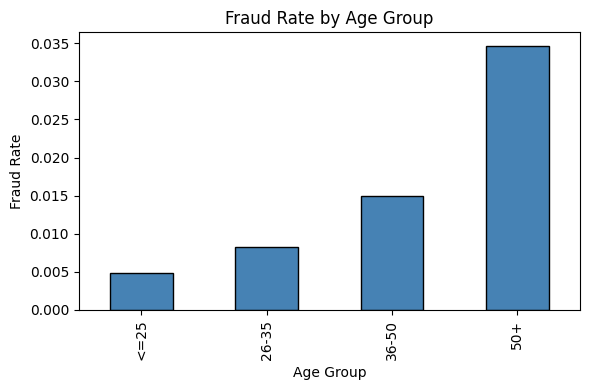

In [89]:
# Fraud rate by age group
bins_age = [0, 25, 35, 50, 120]
labels_age = ["<=25", "26-35", "36-50", "50+"]

df["age_group"] = pd.cut(df["customer_age"], bins=bins_age, labels=labels_age)

fraud_by_age = df.groupby("age_group")["fraud_bool"].mean()

plt.figure(figsize=(6, 4))
fraud_by_age.plot(kind="bar", color="steelblue", edgecolor="black")
plt.ylabel("Fraud Rate")
plt.xlabel("Age Group")
plt.title("Fraud Rate by Age Group")
plt.ylabel("Fraud Rate")
plt.xlabel("Age Group")
plt.title("Fraud Rate by Age Group")
plt.tight_layout()
plt.show()

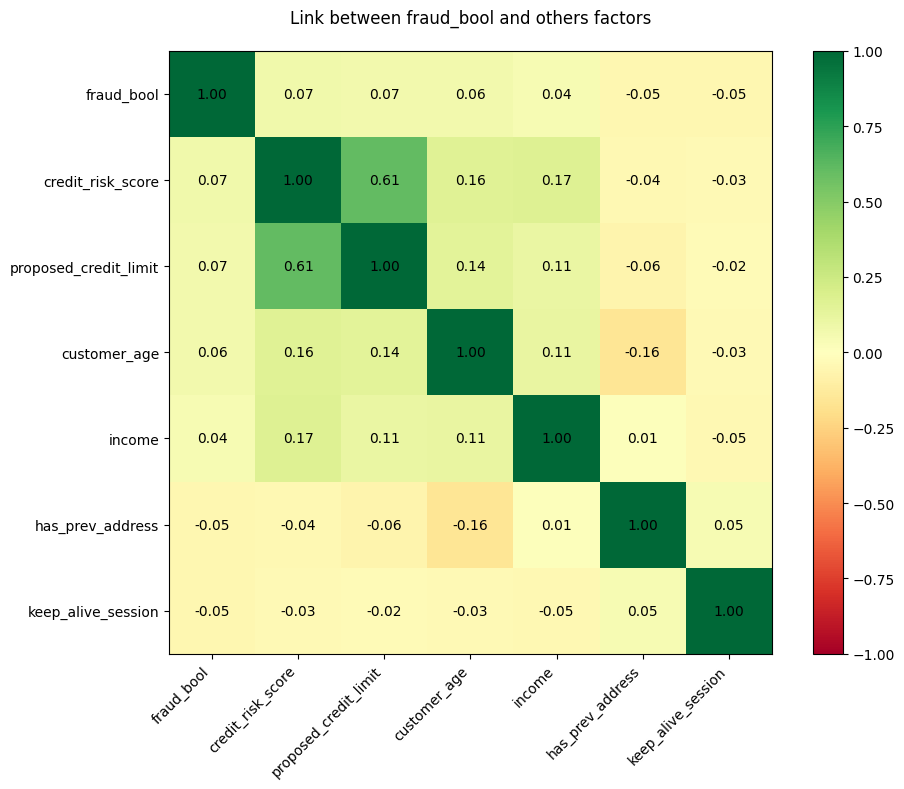

In [90]:
# Heatmap to visualize the correlation between the fraud_bool and others factors
# 1. Selection of key factors

cols = ['fraud_bool', 'credit_risk_score', 'proposed_credit_limit', 
        'customer_age', 'income', 'has_prev_address', 'keep_alive_session']
corr = df[cols].corr()

# 2. Figure creation

fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(corr, cmap='RdYlGn', vmin=-1, vmax=1) # Green = Positive, Red = Négative

# 3. adding labels

ax.set_xticks(np.arange(len(cols)))
ax.set_yticks(np.arange(len(cols)))
ax.set_xticklabels(cols, rotation=45, ha="right")
ax.set_yticklabels(cols)


# 4. Adding values in each square

for i in range(len(cols)):
    for j in range(len(cols)):
        ax.text(j, i, f"{corr.iloc[i, j]:.2f}", ha="center", va="center", color="black")

plt.title("Link between fraud_bool and others factors", pad=20)
plt.colorbar(im)
plt.tight_layout()
plt.show()

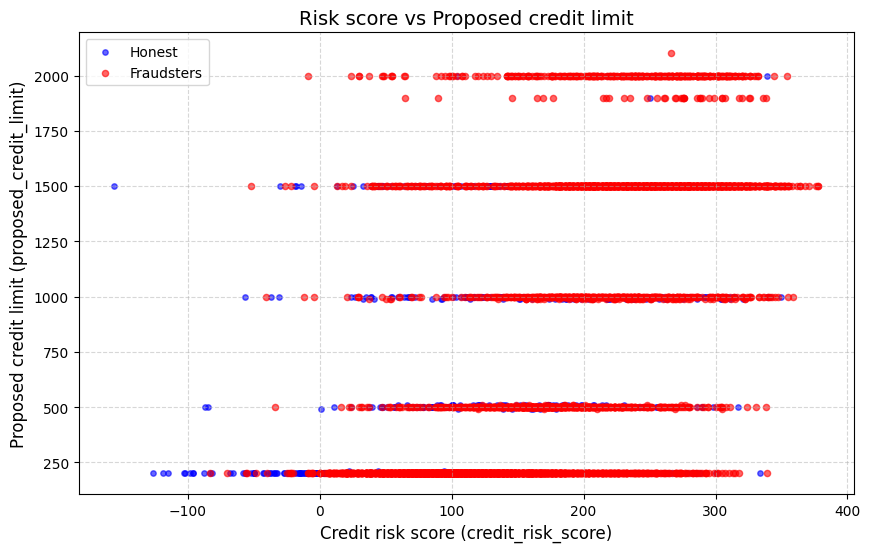

In [91]:
# 1. We separate the data to use different colors
# We take a sample to avoid complete overlap of points
df_normal = df[df['fraud_bool'] == 0].sample(5000, random_state=42)
df_fraude = df[df['fraud_bool'] == 1].sample(5000, random_state=42)

# 2. Creating the plot
plt.figure(figsize=(10, 6))

# We plot honest customers in blue (very transparent)
plt.scatter(df_normal['credit_risk_score'],
            df_normal['proposed_credit_limit'],
            c='blue',
            alpha=0.6,
            s=15,
            label='Honest')

# We plot fraudsters in red (more opaque to stand out)
plt.scatter(df_fraude['credit_risk_score'],
            df_fraude['proposed_credit_limit'],
            c='red',
            alpha=0.6,
            s=20,
            label='Fraudsters')

# 3. Customization
plt.title('Risk score vs Proposed credit limit', fontsize=14)
plt.xlabel('Credit risk score (credit_risk_score)', fontsize=12)
plt.ylabel('Proposed credit limit (proposed_credit_limit)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

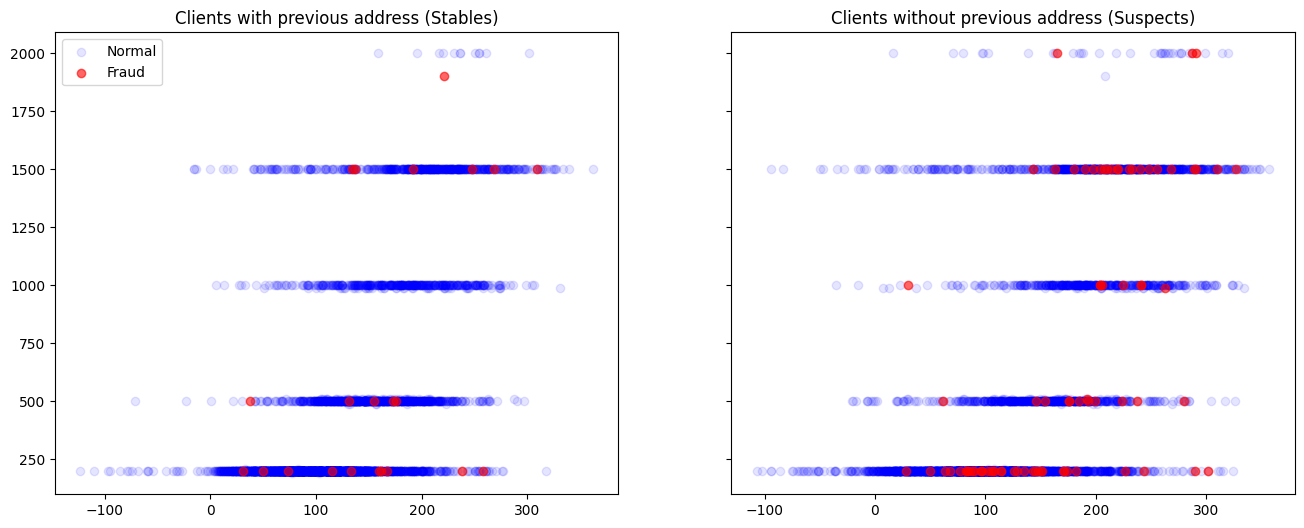

In [92]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Sub-group 1 : those with previous address (has_prev_address = 1)
df_stable = df[df['has_prev_address'] == 1].sample(5000)
ax1.scatter(df_stable[df_stable['fraud_bool']==0]['credit_risk_score'], 
            df_stable[df_stable['fraud_bool']==0]['proposed_credit_limit'], c='blue', alpha=0.1, label='Normal')
ax1.scatter(df_stable[df_stable['fraud_bool']==1]['credit_risk_score'], 
            df_stable[df_stable['fraud_bool']==1]['proposed_credit_limit'], c='red', alpha=0.6, label='Fraud')
ax1.set_title("Clients with previous address (Stables)")
ax1.legend()

# Sub-group 2 : those with no previous address (has_prev_address = 0)
df_instable = df[df['has_prev_address'] == 0].sample(5000)
ax2.scatter(df_instable[df_instable['fraud_bool']==0]['credit_risk_score'], 
            df_instable[df_instable['fraud_bool']==0]['proposed_credit_limit'], c='blue', alpha=0.1)
ax2.scatter(df_instable[df_instable['fraud_bool']==1]['credit_risk_score'], 
            df_instable[df_instable['fraud_bool']==1]['proposed_credit_limit'], c='red', alpha=0.6)
ax2.set_title("Clients without previous address (Suspects)")

plt.show()

--- ANALYSIS OF TEXTUAL FRAUD FACTORS ---n
Variable: housing_status
housing_status
BA    3.753823
BD    0.871418
BC    0.618772
BB    0.603808
BF    0.426829
BG    0.400000
BE    0.352513
Name: fraud_bool, dtype: float64
------------------------------


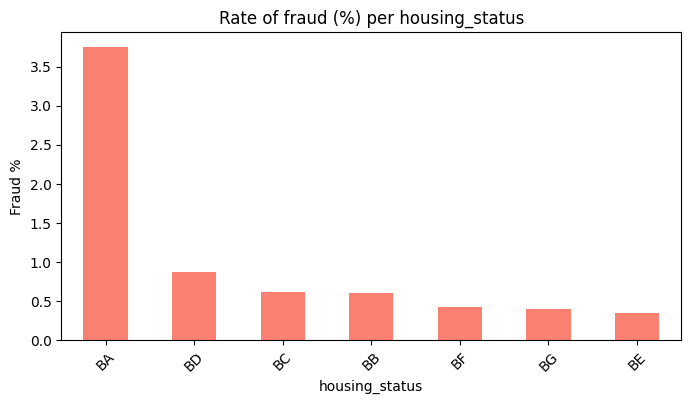

Variable: employment_status
employment_status
CC    2.470676
CG    1.598174
CA    1.238546
CB    0.692445
CD    0.381534
CE    0.255964
CF    0.191567
Name: fraud_bool, dtype: float64
------------------------------


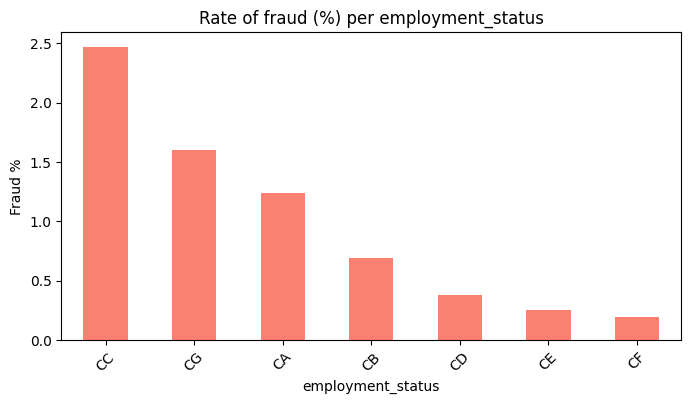

Variable: payment_type
payment_type
AC    1.697418
AB    1.138352
AD    1.099034
AA    0.537281
AE    0.357143
Name: fraud_bool, dtype: float64
------------------------------


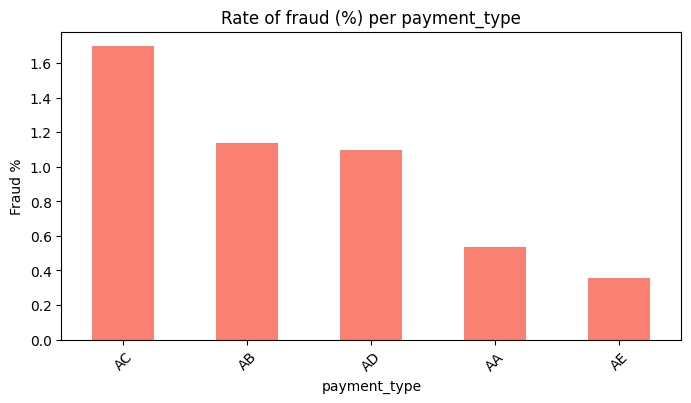

In [93]:

# List of textual columns to analyse
text_columns = ['housing_status', 'employment_status', 'payment_type']

print("--- ANALYSIS OF TEXTUAL FRAUD FACTORS ---n")

for col in text_columns:
    # 1. Calculation of fraud rate per category (%)
    stats = df.groupby(col)['fraud_bool'].mean() * 100
    stats = stats.sort_values(ascending=False)

    # 2. Displaying results in text
    print(f"Variable: {col}")
    print(stats)
    print("-" * 30)

    # 3. Creating a simple plot with Matplotlib
    plt.figure(figsize=(8, 4))
    stats.plot(kind='bar', color='salmon')
    plt.title(f"Rate of fraud (%) per {col}")
    plt.ylabel("Fraud %")
    plt.xticks(rotation=45)
    plt.show()